# Final Exam 
## Shabab Ahmed

### Problem 6: 

Implement the method derived in Problem 5. 

----
## Solution: 

In Problem 5, we found tridiagonal system $Au = f$ we need to solve for with 



$$A = \begin{bmatrix}(\frac{\gamma_02h}{\gamma_1} -2) & 2 & 0 & \dots & 0\\1 & -2 & 1 \\ & 1 & -2 & -1\\    && \ddots & \ddots &\ddots\\    &&&1 & -2 & 1\\    &&&& 1 & -2\end{bmatrix}$$

and $$ f = h^2\begin{bmatrix} f(x_0)+ \frac{2}{h\gamma_1}\sigma\\f(x_1)\\    \vdots\\    f(x_{m-1})\\    f(x_m)-\frac{\beta}{h^2} \end{bmatrix}$$


To implement the method we use the code from the notebook \texttt{BVP1} but make modifications to account for our mixed boundary conditions. 


In [103]:
%matplotlib inline

In [104]:
from pylab import *

To supress warnings:

In [105]:
import logging
logging.captureWarnings(True)

In [115]:
def solve_bvp1(f, alpha, beta, gamma0, gamma1, m):
    """
    Solve the 2-point BVP with mixed BCs
    Input:
        f is a function defining the right hand side,
        alpha defines the value of the mixed boundary condition 
        beta defines the value of the Dirichlet BC
        m is the number of (equally spaced) interior grid points to use.
    
    Returns:
        x = array of grid points (including boundaries, so of length m+2)
        u = array of approximate solution at these points.
    """
    from scipy import sparse
    from scipy.sparse.linalg import spsolve
    

    
    h = 1/float(m+1)    # h = delta x
    x = linspace(0,1,m+2)  
    
    # set up m by m matrix A:
    # note that sparse.diags is analogous to the matlab spdiags function
    em = ones(m+1)
    em1 = ones(m)
    A = sparse.diags([em1, -2*em, em1], [-1, 0, 1], shape=(m+1,m+1))

    # modify A
    A = A.todense()
    A[0,0] = (gamma0*2*h)/(gamma1)-2
    A[0,1] = 2


    
    # right hand side:
    b = f(x)
    b[0] = b[0] +(2/(h*gamma1))*alpha
    b[m] = b[m] - beta / h**2
    rhs = (h**2)* b[0:-1]
    

    # solve system for m interior points and left boundary point: 
    uint = spsolve(A, rhs)
    
    # augment with right boundary value to form u of length m+2:
    u = hstack([uint, beta])

    return x,u

## Test 1:

Testing the solution for: 

$$u''(x) =4$$

with 
$$2u(0) +3u'(0) =1,  u(1) =2.$$

This has the exact solution $u(x) =2x^2+x-1.$

In [116]:
utrue = lambda x: 2*x**2+x-1
f = lambda x: 0*x +4 
gamma0 = 2 
gamma1 =3
alpha = 1
beta = 2


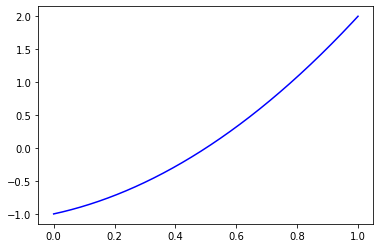

In [117]:
xfine = linspace(0, 1, 1001)
ufine = utrue(xfine)
plot(xfine, ufine, 'b')

Text(0.5, 1.0, 'Plot of error at each grid point (Maximum Error = 2.049e-13)')

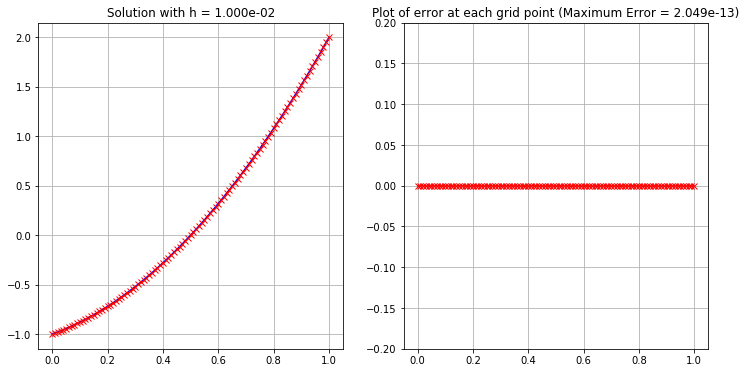

In [121]:
m = 99
# m =4
x,u = solve_bvp1(f, alpha, beta, gamma0, gamma1, m)

figure(figsize=(12,6))
h = 1/(m+1)
subplot(121)
plot(xfine, ufine, 'b')
plot(x, u, 'rx')
grid(True)
title('Solution with h = %.3e' % h)

subplot(122)
E = u - utrue(x)
plot(x, E, 'rx-')
ylim(-0.2, 0.2)
grid(True)
Emax = abs(E).max()
title('Plot of error at each grid point (Maximum Error = %.3e)' % Emax)

## Test 2: 

Now, we test the code on the problem 

$$ u''(x) = -18x +4$$

with $2u(0) + 3u'(0) = 1$ and $u(1)= -1$. 

This has the exact solution $u(x) = -3x^3 +2x^2 +x -1$. We produce a log log plot of the errors using $m+1 = 50, 100, 200, 400, 800. 


In [122]:
utrue = lambda x: -3*x**3+2*x**2+x-1
f = lambda x: -18*x+4
gamma0 = 2 
gamma1 =3
alpha = 1
beta = -1


In [126]:
xfine = linspace(0, 1, 1001)
ufine = utrue(xfine)

Text(0.5, 1.0, 'Plot of error at each grid point (Maximum Error = 5.625e-03)')

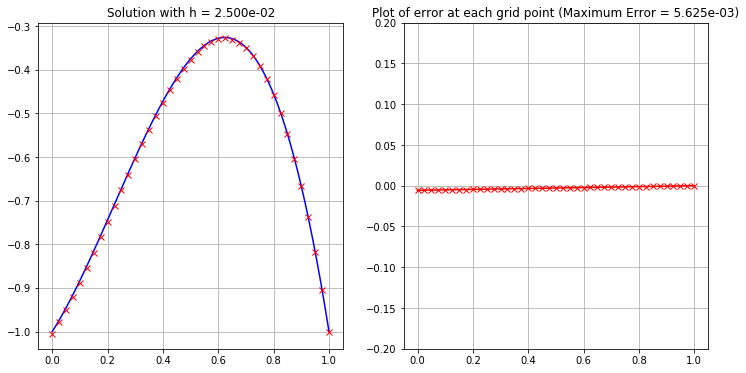

In [144]:
m = 39
# m =4
x,u = solve_bvp1(f, alpha, beta, gamma0, gamma1, m)

figure(figsize=(12,6))
h = 1/(m+1)
subplot(121)
plot(xfine, ufine, 'b')
plot(x, u, 'rx')
grid(True)
title('Solution with h = %.3e' % h)

subplot(122)
E = u - utrue(x)
plot(x, E, 'rx-')
ylim(-0.2, 0.2)
grid(True)
Emax = abs(E).max()
title('Plot of error at each grid point (Maximum Error = %.3e)' % Emax)

We plot the log log of the error plot to check if we achieve second order accuracy.  We include a "reference line" of slope 2.  We expect the errors to have this slope for a second-order accurate method.  We can see that the observed errors have the same slope as the reference line and so we do infact have a second order accurate method. 

In [147]:
mp1_vals = array([50, 100, 200, 400, 800])
h_vals = 1/ mp1_vals   # correspoinding h values

errors = []
print('\n    h                 error ')
for jtest in range(len(mp1_vals)):
    m = mp1_vals[jtest] - 1
    h = h_vals[jtest]
    x,u = solve_bvp1(f, alpha, beta, gamma0, gamma1, m)
    
    x_true = linspace(0, 1, m+2)
    u_true = utrue(x_true)
    error_max = abs(u - u_true).max()
    errors.append(error_max)
    print('%10.8f   %20.16f' % (h,error_max))
    
    


    h                 error 
0.02000000     0.0036000000000105
0.01000000     0.0009000000000456
0.00500000     0.0002250000000625
0.00250000     0.0000562499999861
0.00125000     0.0000140625000551


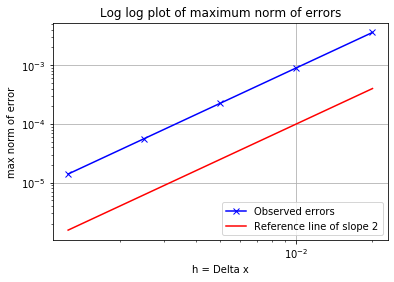

In [148]:
loglog(h_vals, errors, 'bx-', label='Observed errors')
grid(True)
xlabel('h = Delta x')
ylabel('max norm of error')
title('Log log plot of maximum norm of errors')

eref = h_vals**2
loglog(h_vals, eref, 'r-', label='Reference line of slope 2')
legend(loc='lower right')